Read in the points selected by our active learning strategies

In [3]:
import pickle
import numpy as np
# read in the selcted points
with open('selected_passive.pkl', 'rb') as f:
    selected_points = pickle.load(f)
# read in the idices_to_filepath dictionary
with open('idices_to_filepaths_dict.pkl', 'rb') as f:
    indices_to_filepaths = pickle.load(f)

# get the name of the first batch of selected points
BATCH_SIZE = 3
for i in range (BATCH_SIZE):
    print(type(indices_to_filepaths))
    print(type(selected_points))

    # this means the points selected during the simulation with random seed 1
    print(selected_points[0])

    # this means the first random seed with ith selected point
    print(selected_points[0][i])

    print(indices_to_filepaths[selected_points[0][i]])

<class 'dict'>
<class 'dict'>
[1039, 1318, 1140, 679, 597, 66, 85, 520, 92, 1273, 1409, 122, 254, 414, 483, 858, 665, 17, 1673, 482, 52, 1389, 1616, 1498, 1368, 1246, 1695, 532, 1147, 156, 432, 159, 1390, 794, 1317, 1001, 536, 1632, 944, 1114, 379, 535, 963, 553, 996, 1044, 1692, 1164, 229, 1459, 1572, 576, 322, 651, 1196, 940, 223, 381, 1569, 342, 1676, 1109, 745, 957, 1235, 141, 347, 271, 1644, 1054, 1186, 867, 1170, 1086, 240, 4, 204, 795, 152, 526, 711, 219, 979, 1177, 813, 1366, 994, 446, 443, 425, 1149, 1291, 31, 648, 1397, 1334, 299, 1121, 1508, 1093, 1302, 438, 1645, 897, 1332, 706, 89, 575, 475, 1335, 1245, 177, 582, 378, 984, 1492, 1615, 1049, 1013, 1175, 823, 1355, 1294, 452, 326, 1101, 171, 1507, 270, 227, 557, 538, 1461, 1236, 946, 1516, 513, 792, 192, 260, 1521, 1477, 1411, 1283, 308, 906, 440, 977, 1018, 1646, 442, 563, 652, 841, 1566, 461, 133, 202, 1548, 930, 546, 1000, 743, 317, 142, 473, 616, 1168, 995, 315, 689, 170, 1630, 1482, 1553, 1493, 1638, 361, 22, 991, 45, 9

In [2]:
import pickle
import numpy as np
# read in the selcted points
with open('certain_US.pkl', 'rb') as f:
    selected_points2 = pickle.load(f)
# read in the idices_to_filepath dictionary
with open('idices_to_filepaths_dict.pkl', 'rb') as f:
    indices_to_filepaths = pickle.load(f)

# get the name of the first batch of selected points
BATCH_SIZE = 3
for i in range (BATCH_SIZE):
    print(indices_to_filepaths[selected_points2[0][i]])

dataset/s8_r_3/s8_r_3-rock-6-emg.csv
dataset/s1_r_6/s1_r_6-rock-0-emg.csv
dataset/s1_r_6/s1_r_6-rock-1-emg.csv


In [9]:
# fetch out the uncertain and certain points
uncertains= []
certains= []
for i in range (BATCH_SIZE):
    print(indices_to_filepaths[selected_points[0][i]])
    print(indices_to_filepaths[selected_points2[0][i]])
    uncertains.append(indices_to_filepaths[selected_points[0][i]])
    certains.append(indices_to_filepaths[selected_points2[0][i]])

uncertains,certains

dataset/s4_r_5/s4_r_5-rock-9-emg.csv
dataset/s8_r_3/s8_r_3-rock-6-emg.csv
dataset/s6_r_5/s6_r_5-scissors-8-emg.csv
dataset/s1_r_6/s1_r_6-rock-0-emg.csv
dataset/s5_r_3/s5_r_3-paper-0-emg.csv
dataset/s1_r_6/s1_r_6-rock-1-emg.csv


(['dataset/s4_r_5/s4_r_5-rock-9-emg.csv',
  'dataset/s6_r_5/s6_r_5-scissors-8-emg.csv',
  'dataset/s5_r_3/s5_r_3-paper-0-emg.csv'],
 ['dataset/s8_r_3/s8_r_3-rock-6-emg.csv',
  'dataset/s1_r_6/s1_r_6-rock-0-emg.csv',
  'dataset/s1_r_6/s1_r_6-rock-1-emg.csv'])

apply feature extraction functions

In [6]:
import numpy as np
import pandas as pd
import scipy.signal
import matplotlib.pyplot as plt


## Feature extraction functions

# Integrated EMG (IEMG), Mean Absolute (MAV)
def get_iemg_mav(data):
    iemg = np.sum(np.abs(data), axis=1)
    mav = np.mean(np.abs(data), axis=1)
    return iemg, mav

# Simple Square Integral (SSI)
def get_ssi(data):
    ssi = np.sum(data**2, axis=1)
    return ssi

# Frequency Median (FMD)
def get_fmd(f, psd, fmn):
    numerator = np.sum(psd * (f - fmn)**2)
    fmd = np.sqrt(numerator / np.sum(psd))
    return fmd

# Frequency Mean (FMN)
def get_fmn_trial(f, psd):
    fmn_trial = []
    for ch in range(len(psd)):
        ch_data = psd[ch,:]
        fmn = sum(f * ch_data) / sum(ch_data)
        fmn_trial.append(fmn)
    return fmn_trial

# ------------------------------------------------------------------------------------------

## Read data file, apply filter, extract feature

def read_emg_data(file_path):
    # Assuming the file is a CSV with a header and timepoints are rows
    data = pd.read_csv(file_path, usecols=list(range(2, 10)), skiprows=49)
    return data

def preprocess_emg(data, fs=1000, lowcut=20, highcut=450):
    # Bandpass filter settings
    nyq = 0.5 * fs  # Nyquist Frequency
    low = lowcut / nyq
    high = highcut / nyq
    b, a = scipy.signal.butter(4, [low, high], btype='band')
    
    # Apply filter
    filtered_data = scipy.signal.filtfilt(b, a, data, axis=0)
    return filtered_data

def extract_features(data):
    # Assuming data is already preprocessed and shaped correctly
    # Calculate PSD for frequency domain features
    f, psd = scipy.signal.welch(data, fs=1000, nperseg=256)
    fmn = get_fmn_trial(f, psd)
    
    # Time-domain features
    iemg, mav = get_iemg_mav(data)
    ssi = get_ssi(data)
    var = np.var(data, axis=1)
    rms = np.sqrt(np.mean(data**2, axis=1))
    
    # Frequency domain features
    fmd = np.array([get_fmd(f, psd[ch, :], fmn[ch]) for ch in range(len(psd))])
    
    return iemg, mav, ssi, fmd, fmn, var, rms





In [10]:
for file_path in uncertains:
    #file_path = 'dataset/s10_r_1/s10_r_1-paper-0-emg.csv'
    raw_data = read_emg_data(file_path)
    filtered_data = preprocess_emg(raw_data.values)
    features = extract_features(filtered_data.T)  # Transpose if necessary based on your reshaping needs

    print("Features: ", type(features), len(features))
    print('\n')
    print("IEMG: ", len(features[0]))
    print("IEMG: ", features[0])
    print('\n')
    print("MAV: ", len(features[1]))
    print("MAV: ", features[1])
    print('\n')
    print("SSI: ", len(features[2]))
    print("SSI: ", features[2])
    print('\n')
    print("FMD: ", len(features[3]))
    print("FMD: ", features[3])
    print('\n')
    print("FMN: ", len(features[4]))
    print("FMN: ", features[4])
    print('\n')
    print("VAR: ", len(features[5]))
    print("VAR: ", features[5])
    print('\n')
    print("RMS: ", len(features[6]))
    print("RMS: ", features[6])
    print('\n')

Features:  <class 'tuple'> 7


IEMG:  8
IEMG:  [5734.58026898 4660.83822611 4349.79216689 3372.27586079 1559.11605734
 1862.35996607 4403.92253259 6121.22896391]


MAV:  8
MAV:  [16.33783552 13.27874138 12.39257028  9.60762354  4.44192609  5.30586885
 12.54678784 17.43939876]


SSI:  8
SSI:  [241345.08077868 133531.01345365  88498.1843243   74737.47876643
  16074.60131952  24604.09318349 147683.0212972  260060.90126271]


FMD:  8
FMD:  [110.99790341 125.05992138 118.61682098 116.10061952 105.60862947
 104.16695956 103.34957174 103.69617267]


FMN:  8
FMN:  [309.57810413262877, 264.65992444900377, 239.63015672110876, 273.9272260329568, 286.9212041449778, 268.5196092763544, 276.23650017627466, 313.7154297187972]


VAR:  8
VAR:  [687.47826629 380.42959779 251.98373465 212.37341067  45.69658258
  70.0481909  420.37271042 740.25246155]


RMS:  8
RMS:  [26.2219912  19.50462093 15.87865168 14.5920283   6.76731741  8.37240298
 20.51217561 27.21974005]


Features:  <class 'tuple'> 7


IEMG:  8


exploration of characteristics of selected points 

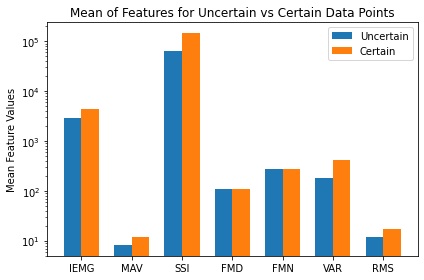

array([2.87148935e+03, 8.15871277e+00, 6.33702495e+04, 1.10718914e+02,
       2.79357944e+02, 1.80176997e+02, 1.17001606e+01])

In [23]:
# Calculate the mean across the data points (axis=0)
uncertain_mean = np.mean(uncertain_features, axis=0)
certain_mean = np.mean(certain_features, axis=0)

# These means are 2D arrays of shape (7, 8), where 7 is the number of features
# and 8 is the number of channels. To plot them, you might want to average over the channels as well,
# or select a specific channel to plot.

# For illustration, here's how you would average over the channels as well
uncertain_mean = np.mean(uncertain_mean, axis=1)
certain_mean = np.mean(certain_mean, axis=1)

# Now you should have 1D arrays of shape (7,) that you can plot.

# Plotting the mean features for uncertain and certain points
feature_labels = ['IEMG', 'MAV', 'SSI', 'FMD', 'FMN', 'VAR', 'RMS']
x = np.arange(len(feature_labels))  # the label locations

fig, ax = plt.subplots()
width = 0.35  # the width of the bars

rects1 = ax.bar(x - width/2, uncertain_mean, width, label='Uncertain')
rects2 = ax.bar(x + width/2, certain_mean, width, label='Certain')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Mean Feature Values')
ax.set_title('Mean of Features for Uncertain vs Certain Data Points')
ax.set_xticks(x)
ax.set_yscale('log')

ax.set_xticklabels(feature_labels)
ax.legend()

fig.tight_layout()
plt.show()

uncertain_mean

### MAV and SSI Differences:

uncertain data points having a markedly higher mean value in these features. This could suggest that the uncertain points may have more variation or higher signal amplitudes, leading to a higher level of uncertainty in the classification.

### RMS Observation:

RMS (Root Mean Square) appears to be slightly higher for uncertain data points, which could correlate with the signal power and might be a factor in uncertainty if the model finds high-power signals harder to classify confidently.

### IEMG:

Higher IEMG values might be associated with stronger muscle contractions or more active muscle fibers during the recording period, which could lead to more variability within the signal, causing uncertainty in classification.